# Support Vector Machines

Support Vector Machines disebut sebagai pendekatan klasifikasi, tetapi dapat digunakan di kedua jenis masalah klasifikasi dan regresi. Ini dapat dengan mudah menangani beberapa variabel kontinu dan kategorikal. SVM membangun bidang hiper dalam ruang multidimensi untuk memisahkan kelas yang berbeda. SVM menghasilkan hyperplane optimal secara berulang, yang digunakan untuk meminimalkan kesalahan. Ide inti dari SVM adalah menemukan hyperplane marginal maksimum (MMH) yang paling baik membagi dataset menjadi beberapa kelas.

* Support Vector adalah titik data, yang paling dekat dengan bidang-hiper. Titik-titik ini akan menentukan garis pemisah dengan lebih baik dengan menghitung margin. Poin-poin ini lebih relevan dengan konstruksi pengklasifikasi.

* Hyperplane adalah bidang keputusan yang memisahkan antara sekumpulan objek yang memiliki keanggotaan kelas yang berbeda.

* Margin
Margin adalah celah antara dua garis pada poin kelas terdekat. Ini dihitung sebagai jarak tegak lurus dari garis untuk mendukung vektor atau titik terdekat. Jika margin lebih besar di antara kelas, maka itu dianggap sebagai margin yang baik, margin yang lebih kecil adalah margin yang buruk.

# Bagaimana cara kerja SVM?

Tujuan utamanya adalah untuk memisahkan kumpulan data yang diberikan dengan cara sebaik mungkin. Jarak antara salah satu titik terdekat dikenal sebagai margin. Tujuannya adalah untuk memilih hyperplane dengan kemungkinan margin maksimum antara vektor dukungan dalam dataset yang diberikan. SVM mencari hyperplane marginal maksimum dalam langkah-langkah berikut:

* Hasilkan hyperplanes yang memisahkan kelas dengan cara terbaik. Gambar di sisi kiri menunjukkan tiga hyperplanes hitam, biru dan oranye. Di sini, biru dan oranye memiliki kesalahan klasifikasi yang lebih tinggi, tetapi hitam memisahkan kedua kelas dengan benar.

* Pilih bidang-hiper kanan dengan segregasi maksimum dari salah satu titik data terdekat seperti yang ditunjukkan pada gambar sebelah kanan.

### Berurusan dengan bidang non-linier dan tidak terpisahkan
Beberapa masalah tidak dapat diselesaikan dengan menggunakan hyperplane linier, seperti yang ditunjukkan pada gambar di bawah ini (sisi kiri).

Dalam situasi seperti itu, SVM menggunakan trik kernel untuk mengubah ruang masukan ke ruang dimensi yang lebih tinggi seperti yang ditunjukkan di sebelah kanan. Titik data diplot pada sumbu x dan sumbu z (Z adalah jumlah kuadrat dari x dan y: z = x ^ 2 = y ^ 2). Sekarang Anda dapat dengan mudah memisahkan titik-titik ini menggunakan pemisahan linier.

![image](https://user-images.githubusercontent.com/50357969/100458111-cf6bc780-30f5-11eb-86e8-2438626ceec1.png)

In [4]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Load dataset

url = "https://raw.githubusercontent.com/AzizLike29/Analysis-Kasus_Perceraian/master/Dataset/Kasus_Peceraian_Jawa%20Barat.csv"
df = pd.read_csv(url)
df.head(10)

,id,kode_provinsi,nama_provinsi,wilayah_pengadilan_agama,faktor_penyebab,jumlah_perceraian,satuan,tahun
0,1,32,JAWA BARAT,BANDUNG,MABUK,11,KASUS,2017
1,2,32,JAWA BARAT,BANDUNG,JUDI,1,KASUS,2017
2,3,32,JAWA BARAT,BANDUNG,MENINGGALKAN SALAH SATU,504,KASUS,2017
3,4,32,JAWA BARAT,BANDUNG,POLIGAMI,112,KASUS,2017
4,5,32,JAWA BARAT,BANDUNG,KEKERASAN DALAM RUMAH TANGGA,39,KASUS,2017
5,6,32,JAWA BARAT,BANDUNG,PERSELISIHAN & PERTENGKARAN TERUS MENERUS,3102,KASUS,2017
6,7,32,JAWA BARAT,BANDUNG,KAWIN PAKSA,338,KASUS,2017
7,8,32,JAWA BARAT,BANDUNG,EKONOMI,1313,KASUS,2017
8,9,32,JAWA BARAT,BEKASI,ZINA,3,KASUS,2017
9,10,32,JAWA BARAT,BEKASI,MABUK,5,KASUS,2017


In [6]:
#Summarize dataset

df.shape

(520, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        520 non-null    int64 
 1   kode_provinsi             520 non-null    int64 
 2   nama_provinsi             520 non-null    object
 3   wilayah_pengadilan_agama  520 non-null    object
 4   faktor_penyebab           520 non-null    object
 5   jumlah_perceraian         520 non-null    int64 
 6   satuan                    520 non-null    object
 7   tahun                     520 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 32.6+ KB


In [8]:
#Check for null values

df.isna().sum()

id                          0
kode_provinsi               0
nama_provinsi               0
wilayah_pengadilan_agama    0
faktor_penyebab             0
jumlah_perceraian           0
satuan                      0
tahun                       0
dtype: int64

In [9]:
#Check for duplicated rows

df.duplicated().sum()

0

In [10]:
#Statistical analysis

df.describe()

,id,kode_provinsi,jumlah_perceraian,tahun
count,520.000000,520.0,520.000000,520.000000
mean,260.500000,32.0,306.267308,2020.900000
std,150.255338,0.0,786.589323,2.864573
min,1.000000,32.0,0.000000,2017.000000
25%,130.750000,32.0,1.000000,2017.000000
50%,260.500000,32.0,9.000000,2023.000000
75%,390.250000,32.0,124.000000,2023.000000
max,520.000000,32.0,6518.000000,2023.000000


Jumlah data per tahun:
tahun
2023    338
2017    182
Name: count, dtype: int64
Jumlah data per kategori jumlah perceraian:
jumlah_perceraian
1       79
0       70
2       40
5       18
3       15
        ..
527      1
5302     1
413      1
1077     1
2026     1
Name: count, Length: 193, dtype: int64


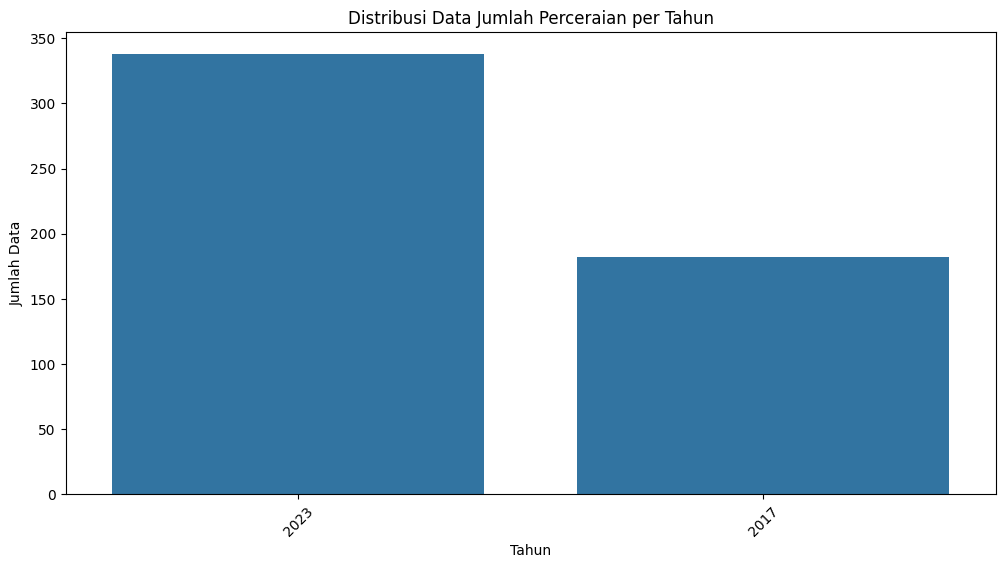

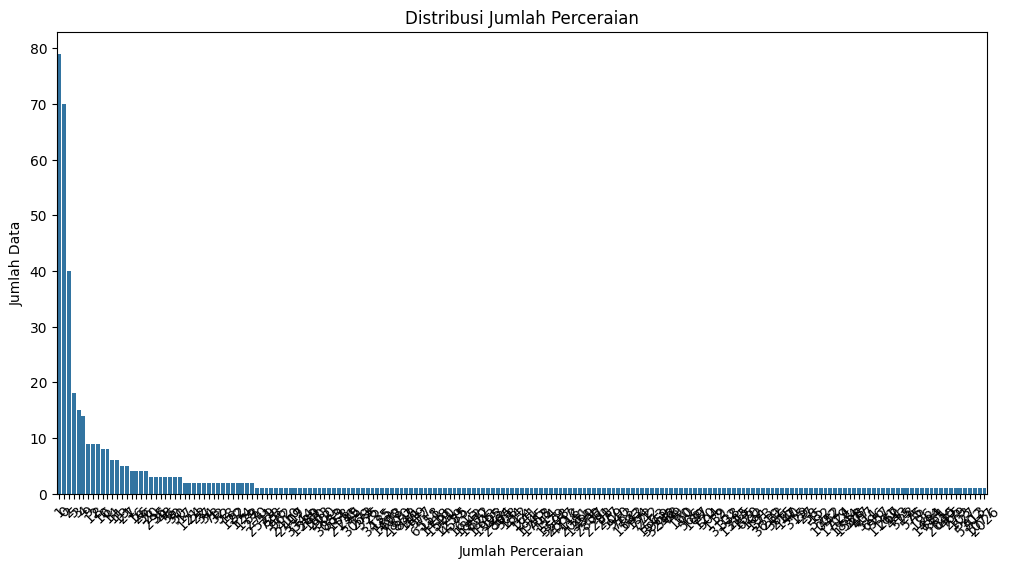

In [11]:
#Exploratory data Analysis (EDA)

# Display the amount of data for each year
print("Jumlah data per tahun:")
print(df['tahun'].value_counts())

# Display the amount of data in each category 'number_of_divorces'
print("Jumlah data per kategori jumlah perceraian:")
print(df['jumlah_perceraian'].value_counts())

# Visualisation of data distribution of number of divorces per year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='tahun', order=df['tahun'].value_counts().index)
plt.title('Distribusi Data Jumlah Perceraian per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.show()

# Visualisation of the distribution of the number of divorces
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='jumlah_perceraian', order=df['jumlah_perceraian'].value_counts().index)
plt.title('Distribusi Jumlah Perceraian')
plt.xlabel('Jumlah Perceraian')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.show()

In [12]:
#Average sugar level for the 2023 and 2017 year

df.groupby('tahun').mean(numeric_only=True)

,id,kode_provinsi,jumlah_perceraian
tahun,,,
2017,91.5,32.0,397.868132
2023,351.5,32.0,256.943787


# **Data Preprocessing**

In [13]:
#Segregate dataset into x & y

x = df.drop('tahun', axis=1)
y = df['tahun']
x

,id,kode_provinsi,nama_provinsi,wilayah_pengadilan_agama,faktor_penyebab,jumlah_perceraian,satuan
0,1,32,JAWA BARAT,BANDUNG,MABUK,11,KASUS
1,2,32,JAWA BARAT,BANDUNG,JUDI,1,KASUS
2,3,32,JAWA BARAT,BANDUNG,MENINGGALKAN SALAH SATU,504,KASUS
3,4,32,JAWA BARAT,BANDUNG,POLIGAMI,112,KASUS
4,5,32,JAWA BARAT,BANDUNG,KEKERASAN DALAM RUMAH TANGGA,39,KASUS
...,...,...,...,...,...,...,...
515,516,32,JAWA BARAT,TASIKMALAYA,CACAT BADAN,1,KASUS
516,517,32,JAWA BARAT,TASIKMALAYA,PERSELISIHAN & PERTENGKARAN TERUS MENERUS,1830,KASUS
517,518,32,JAWA BARAT,TASIKMALAYA,KAWIN PAKSA,1,KASUS
518,519,32,JAWA BARAT,TASIKMALAYA,MURTAD,0,KASUS


In [14]:
y

0      2017
1      2017
2      2017
3      2017
4      2017
       ... 
515    2023
516    2023
517    2023
518    2023
519    2023
Name: tahun, Length: 520, dtype: int64

In [15]:
#Data Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Select only numerical columns from x
numerical_cols = x.select_dtypes(include=['number']).columns
x_numeric = x[numerical_cols]

x_std = scaler.fit_transform(x_numeric)
x_std

array([[-1.72872314,  0.        , -0.37573816],
       [-1.72206139,  0.        , -0.38846352],
       [-1.71539964,  0.        ,  0.25162189],
       ...,
       [ 1.71539964,  0.        , -0.38846352],
       [ 1.72206139,  0.        , -0.38973606],
       [ 1.72872314,  0.        ,  2.1884211 ]])

In [16]:
#Train test splitting

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.25,random_state=0)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_train.shape)

x_train (390, 3)
x_test (130, 3)
y_train (390,)
y_test (390,)


# **Model Generation-SVM**

In [26]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [27]:
classifier = svm.SVC(kernel='linear')

#training the support vector machine classifier(SVM)
classifier.fit(x_train, y_train)

SVC(kernel='linear')

# **Model Evaluation**

In [29]:
#Accuracy, precision, recall score on the training data
y_train_prediction=classifier.predict(x_train)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
print('Accuracy score of training data : ', training_data_accuracy * 100)

training_data_precision = precision_score(y_train, y_train_prediction, average='weighted')
print('Precision score of training data : ', training_data_precision * 100)

training_data_recall = recall_score(y_train, y_train_prediction, average='weighted')
print('Recall score of training data : ', training_data_recall * 100)

Accuracy score of training data :  98.97435897435898
Precision score of training data :  98.9765934863974
Recall score of training data :  98.97435897435898


In [32]:
#Accuracy, precision, recall score on the test data
y_test_prediction=classifier.predict(x_test)
testing_data_accuracy = accuracy_score(y_test, y_test_prediction)
print('Accuracy score of testing data : ', testing_data_accuracy * 100)

testing_data_precision = precision_score(y_test, y_test_prediction, average='weighted')
print('Precision score of testing data : ', testing_data_precision * 100)

testing_data_recall = recall_score(y_test, y_test_prediction, average='weighted')
print('Recall score of testing data : ', testing_data_recall * 100)

Accuracy score of testing data :  99.23076923076923
Precision score of testing data :  99.23971377459749
Recall score of testing data :  99.23076923076923


# Keuntungan
Pengklasifikasi SVM menawarkan akurasi yang baik dan melakukan prediksi yang lebih cepat dibandingkan dengan algoritma Naïve Bayes. Mereka juga menggunakan lebih sedikit memori karena mereka menggunakan subset poin pelatihan dalam fase keputusan. SVM bekerja dengan baik dengan batas pemisah yang jelas dan dengan ruang berdimensi tinggi.

# Kekurangan
SVM tidak cocok untuk kumpulan data besar karena waktu pelatihannya yang tinggi dan juga membutuhkan lebih banyak waktu dalam pelatihan dibandingkan dengan Naïve Bayes. Ini berfungsi buruk dengan kelas yang tumpang tindih dan juga sensitif terhadap jenis kernel yang digunakan.